In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
from task4module.task4module import *
from Task3.task3module.task3module import squares, levenmarq
mpl.style.use('classic')
plt.figure(figsize=(8, 6), dpi = 80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
np.random.seed(42)

In [3]:
x = np.linspace(0, 3, num = 1001)
N = 1001
f = lambda x: 1/(x**2-3*x+2)
y = f(x)
y[np.abs(y) > 100] = 100*np.sign(y[np.abs(y) > 100])
y += np.random.normal(size = N)

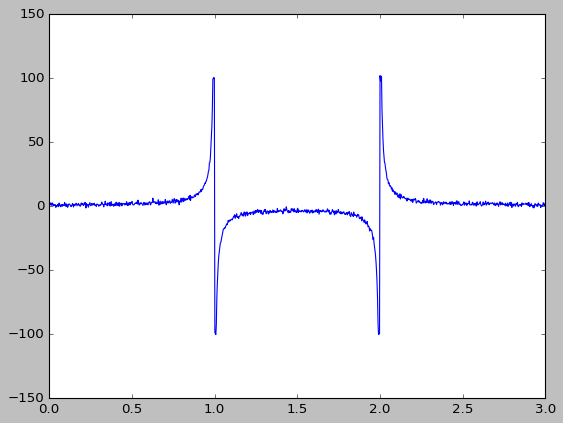

In [4]:
plt.plot(x, y)

In [5]:
def cost_function(a, b, c, d):
    y_pred = (a*x+b)/(x**2+c*x+d)
    return squares(y, y_pred) if -10 < a < 10 and\
                                     -10 < b < 10 and\
                                     -10 < c < 10 and\
                                     -10 < d < 10 else np.infty

def cost_function_v(theta):
    return cost_function(theta[0], theta[1], theta[2], theta[3])

In [6]:
initpopulation = np.random.rand(4, 10)*6-3

In [7]:
initpopulation

array([[-2.81048313,  2.61727348, -2.6881723 ,  0.24777801,  1.25436312,
         2.22581474,  1.28452159,  1.8103685 , -0.96329884,  1.88895068],
       [-2.51931092,  2.36889994,  0.28555426,  1.90378662, -0.28609029,
         0.86146617,  0.15841597,  1.38953713, -2.51022011, -2.6378875 ],
       [-1.5173806 , -2.04273192,  2.2307014 , -1.68471608,  2.85519153,
        -0.97862525, -1.90729251,  1.73819104,  0.95224665, -0.0108257 ],
       [ 0.33218131,  1.31521067, -1.62927155,  2.9780035 ,  2.84875897,
         0.90195412, -1.80274529,  1.08136945, -2.56680955, -2.81608499]])

In [8]:
optimal, val, stats, precision = difevol(cost_function_v, 4, 10, initpopulation = initpopulation, maxiter=1000,
                                         optpoint=np.array([0, 1, -3, 2]),
                                         maxbeststayiters=50)
optimal, val, stats, precision

(array([-1.00998872,  1.01048951, -2.00095664,  1.0009732 ]),
 array([136442.46736124]),
 {'iterations': 591, 'funccalcs': 5920},
 1.7367583104318849)

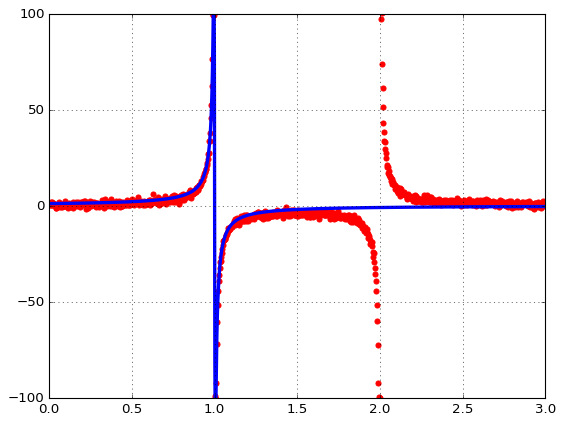

In [9]:
fig = plt.figure(facecolor="white")
plt.scatter(x, y, color = "red")
plt.plot(x, (optimal[0]*x + optimal[1])/(x*x+optimal[2]*x+optimal[3]), linewidth = 3)
plt.ylim((-100, 100))
plt.xlim(0, 3)
plt.grid(True)

In [10]:
import pyswarm

In [11]:
ans = pyswarm.pso(cost_function_v, lb = [-4, -4, -4 ,-4], ub = [4, 4, 4, 4], maxiter=10000, swarmsize=100,
                  debug=True)
ans

No constraints given.
New best for swarm at iteration 1: [-4.          0.9696988   0.96606589  4.        ] 268067.6839047686
New best for swarm at iteration 1: [-3.0672171   2.51333779  0.28284076  1.2412377 ] 267782.9979004995
Best after iteration 1: [-3.0672171   2.51333779  0.28284076  1.2412377 ] 267782.9979004995
New best for swarm at iteration 2: [ 0.71326193 -2.21299409 -3.54184438  4.        ] 267055.10136733844
Best after iteration 2: [ 0.71326193 -2.21299409 -3.54184438  4.        ] 267055.10136733844
New best for swarm at iteration 3: [-1.63534481  1.20192515 -2.70109555  1.98540571] 264646.73781103216
Best after iteration 3: [-1.63534481  1.20192515 -2.70109555  1.98540571] 264646.73781103216
New best for swarm at iteration 4: [-0.69670087  0.35488516 -2.52796637  1.68112918] 262415.10634852055
Best after iteration 4: [-0.69670087  0.35488516 -2.52796637  1.68112918] 262415.10634852055
Best after iteration 5: [-0.69670087  0.35488516 -2.52796637  1.68112918] 262415.10634852

(array([-0.65321063,  0.62535215, -2.22199072,  1.24276193]),
 257494.91643479205)

(-100.0, 100.0)

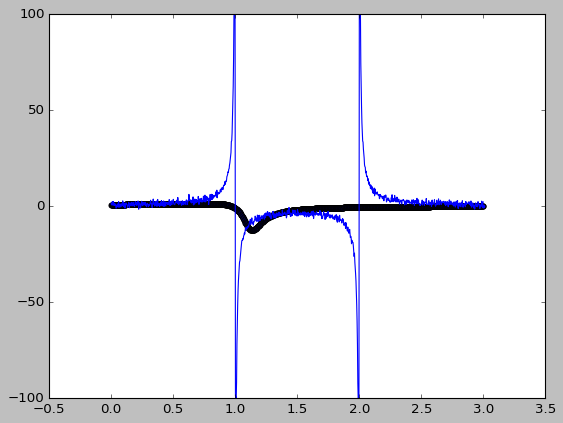

In [12]:
plt.scatter(x, (ans[0][0]*x + ans[0][1])/(x*x+ans[0][2]*x+ans[0][3]))
plt.plot(x, y)
plt.ylim((-100, 100))

In [13]:
from scipy.optimize import minimize

In [14]:
nmans = minimize(fun = cost_function_v, x0 = np.array([-1.5, -2.5, 3.5, 4.5]), method="Nelder-Mead", bounds=((-10, 10), (-10, 10), (-10, 10), (-10, 10)), options={"maxfev": 1000})
nmans

 final_simplex: (array([[-1.00996462,  1.01046538, -2.00095675,  1.00097331],
       [-1.00995276,  1.01045362, -2.00095685,  1.0009734 ],
       [-1.00995385,  1.01045468, -2.00095675,  1.0009733 ],
       [-1.00995653,  1.01045725, -2.00095649,  1.00097304],
       [-1.00992055,  1.01042136, -2.00095711,  1.00097367]]), array([136442.46727156, 136442.46727188, 136442.46728429, 136442.46730501,
       136442.46735836]))
           fun: 136442.46727156395
       message: 'Optimization terminated successfully.'
          nfev: 695
           nit: 409
        status: 0
       success: True
             x: array([-1.00996462,  1.01046538, -2.00095675,  1.00097331])

(-100.0, 100.0)

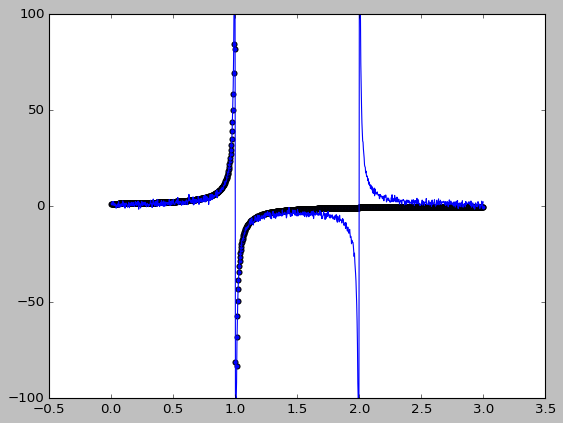

In [15]:
plt.scatter(x, (nmans.x[0]*x + nmans.x[1])/(x*x+nmans.x[2]*x+nmans.x[3]))
plt.plot(x, y)
plt.ylim((-100, 100))

In [50]:
xlist = np.linspace(-10, 10, 301)
ylist = np.linspace(-10, 10, 301)
X, Y = np.meshgrid(xlist, ylist)

<a list of 23 text.Text objects>

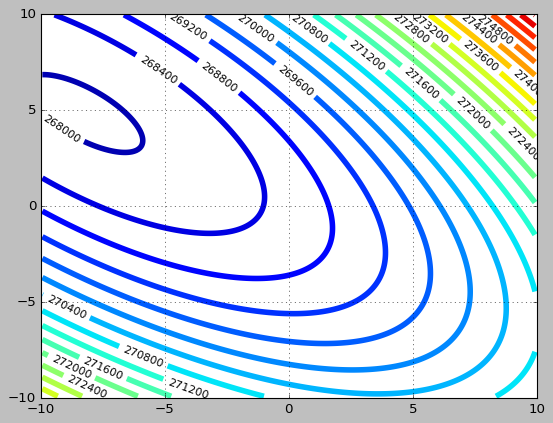

In [51]:
Z = np.array([[cost_function(x,  y,  3.66609284,  2.72640687) for x in xlist] for y in ylist])
cp = plt.contour(X, Y, Z, levels = 25, linewidths = 5)
#cp.axes.set_xticks(np.arange(0, 1, 0.05))
#cp.axes.set_yticks(np.arange(0, 1, 0.05))
cp.axes.grid(True)
plt.clabel(cp, inline=True,
          fontsize=10, colors = "black")

In [18]:
import autograd as ag

In [19]:
def cost_function_grad(theta):
    dfa = -2*np.sum((y - (theta[0]*x+theta[1])/(x*x+theta[2]*x+theta[3]))*x/(x*x+theta[2]*x+theta[3]))
    dfb = -2*np.sum((y - (theta[0]*x+theta[1])/(x*x+theta[2]*x+theta[3]))/(x*x+theta[2]*x+theta[3]))
    dfc = 2*np.sum((y - (theta[0]*x+theta[1])/(x*x+theta[2]*x+theta[3]))*x/(x*x+theta[2]*x+theta[3])**2)
    dfd = 2*np.sum((y - (theta[0]*x+theta[1])/(x*x+theta[2]*x+theta[3]))/(x*x+theta[2]*x+theta[3])**2)
    return np.array([dfa, dfb, dfc, dfd], dtype = float)

In [20]:
def cost_function_hess(theta):
    d2faa = 2*np.sum(x**2/(x*x+theta[2]*x+theta[3])**2)
    d2fab = 2*np.sum(x/(x*x+theta[2]*x+theta[3])**2)
    d2fac = 2*np.sum(x**2*(-2*(theta[0]*x+theta[1]) + y*(x*x+theta[2]*x+theta[3]))/(x*x+theta[2]*x+theta[3])**3)
    d2fad = 2*np.sum(x*(-2*(theta[0]*x+theta[1]) + y*(x*x+theta[2]*x+theta[3]))/(x*x+theta[2]*x+theta[3])**3)
    d2fbb = 2*np.sum(1./(x*x+theta[2]*x+theta[3])**2)
    d2fbc = 2*np.sum(x*(-2*(theta[0]*x+theta[1]) + y*(x*x+theta[2]*x+theta[3]))/(x*x+theta[2]*x+theta[3])**3)
    d2fbd = 2*np.sum((-2*(theta[0]*x+theta[1]) + y*(x*x+theta[2]*x+theta[3]))/(x*x+theta[2]*x+theta[3])**3)
    d2fcc = -2*np.sum(x**2*(theta[0]*x+theta[1])*(-3*(theta[0]*x+theta[1]) + 2*y*(x*x+theta[2]*x+theta[3]))/(x*x+theta[2]*x+theta[3])**4)
    d2fcd = -2*np.sum(x*(theta[0]*x+theta[1])*(-3*(theta[0]*x+theta[1]) + 2*y*(x*x+theta[2]*x+theta[3]))/(x*x+theta[2]*x+theta[3])**4)
    d2fdd = -2*np.sum((theta[0]*x+theta[1])*(-3*(theta[0]*x+theta[1]) + 2*y*(x*x+theta[2]*x+theta[3]))/(x*x+theta[2]*x+theta[3])**4)
    return np.array([
        [d2faa, d2fab, d2fac, d2fad],
        [d2fab, d2fbb, d2fbc, d2fbd],
        [d2fac, d2fbc, d2fcc, d2fcd],
        [d2fad, d2fbd, d2fcd, d2fdd]
    ], dtype = float)

In [21]:
cost_function_grad([0,  -2, -3,  2])

array([-1.93059313e+07, -1.28693028e+07,  1.10248859e+10,  7.34876442e+09])

In [22]:
grad = ag.grad(cost_function_v)

In [23]:
hess = ag.hessian(cost_function_v)
hess(np.array([1., 1., 1., 1.]))

array([[ 156.58118272,  152.52250604, -294.91746751, -219.9783054 ],
       [ 152.52250604,  311.38100703, -219.9783054 , -345.692754  ],
       [-294.91746751, -219.9783054 ,  263.22671217,  170.8849597 ],
       [-219.9783054 , -345.692754  ,  170.8849597 ,  322.10071055]])

In [24]:
limits = np.array([[-10., 10.], [-10., 10.], [-10., 10.], [-10., 10.]])
limits

array([[-10.,  10.],
       [-10.,  10.],
       [-10.,  10.],
       [-10.,  10.]])

In [44]:
lmans = levenmarq(cost_function_v, limits = limits, x0 = np.array([-1.5, -2.5, 3.5,  4.5]), regulpar=(10000, 100000), funchess=cost_function_hess, funcgrad=cost_function_grad, maxiter=1000, optpoint=np.array([0, 1, -3, 2]) )
lmans

(array([-5.37502348,  2.36784037,  3.66609284,  2.72640687]),
 268033.78876078356,
 {'iterations': 1000,
  'funccalcs': 42000,
  'gradcalcs': 1000,
  'hesscalcs': 1000,
  'matrixinversions': 40000},
 8.70208741285285)

(-100.0, 100.0)

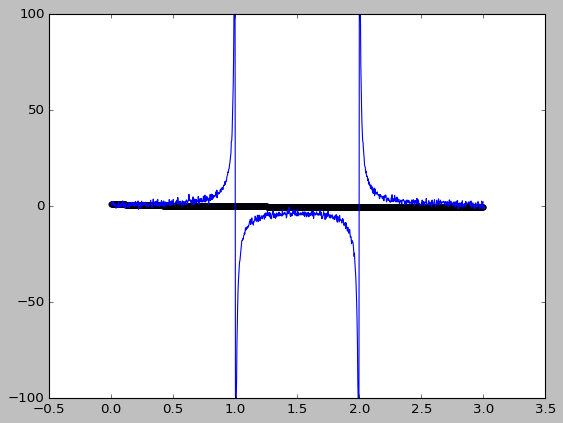

In [26]:
plt.scatter(x, (lmans[0][0]*x + lmans[0][1])/(x*x+lmans[0][2]*x+lmans[0][3]))
plt.plot(x, y)
plt.ylim((-100, 100))

In [27]:
cost_function(0,1,-2,0.74)

3139189.4714171262

In [28]:
minimize(cost_function_v, x0 = np.array([ 1. ,1. ,0., 1.]), method="BFGS")

      fun: 136442.46899088257
 hess_inv: array([[ 8.70162768e-06, -8.70651853e-06, -6.48628638e-09,
         6.18755742e-09],
       [-8.70651853e-06,  8.71153634e-06,  6.27947161e-09,
        -5.98047259e-09],
       [-6.48628643e-09,  6.27947166e-09,  8.06258445e-10,
        -8.06550406e-10],
       [ 6.18755747e-09, -5.98047265e-09, -8.06550406e-10,
         8.06861259e-10]])
      jac: array([ -3228.4296875 ,  -3232.55078125, 621337.63476562, 622162.22460938])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 607
      nit: 44
     njev: 119
   status: 2
  success: False
        x: array([-1.00981861,  1.01031926, -2.00095732,  1.00097387])

In [29]:
def residuals(theta):
    y_pred = (theta[0]*x+theta[1])/(x**2+theta[2]*x+theta[3])
    return y_pred - y

In [30]:
from scipy.optimize import least_squares

In [31]:
least_squares(residuals, x0 = np.array([ 0. ,0. ,0., 1.]))

 active_mask: array([0., 0., 0., 0.])
        cost: 68244.89495905378
         fun: array([ 0.01621184,  0.65197816, -0.13318434, ..., -0.44185893,
       -1.58258275, -2.40633564])
        grad: array([   935.7432266 ,   1145.87162738, 161397.67813144, 152282.28080696])
         jac: array([[-0.        ,  0.99874301, -0.        , -1.01165273],
       [ 0.00301428,  1.0047587 , -0.00306243, -1.02080644],
       [ 0.00606497,  1.0108289 , -0.00618043, -1.0300709 ],
       ...,
       [ 0.75347731,  0.25166243,  0.3831479 ,  0.12797192],
       [ 0.7519672 ,  0.25090665,  0.38180539,  0.12739585],
       [ 0.75046278,  0.25015426,  0.38046978,  0.12682325]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 52
        njev: 30
  optimality: 161397.67813143833
      status: 3
     success: True
           x: array([-1.01362371,  1.01420083, -2.00124172,  1.00125857])

In [32]:
cost_function(1, -3, -6, 9.1)

269221.1714468144

Text(0.5, 0, 'Zoomed sector')

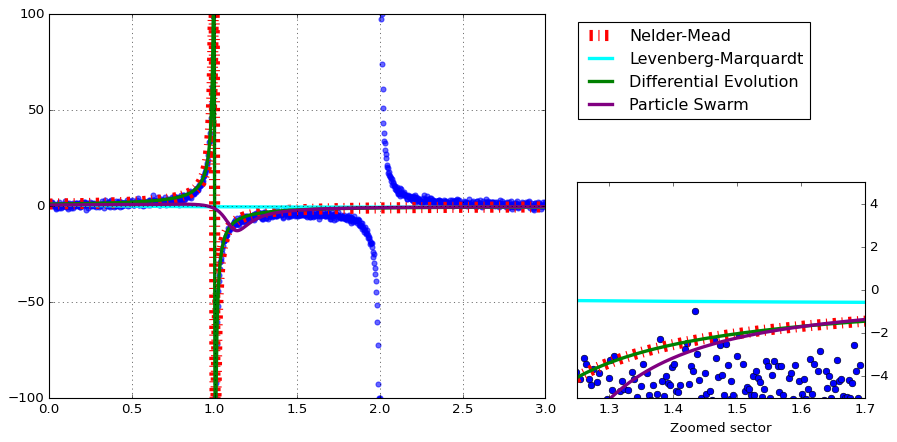

In [45]:
fig = plt.figure(facecolor="white")
plt.scatter(x, y, color = "blue", alpha = 0.6)
plt.plot(x, (nmans.x[0]*x + nmans.x[1])/(x*x+nmans.x[2]*x+nmans.x[3]), linewidth = 10, color = "red", label = "Nelder-Mead", linestyle = "-.")
plt.plot(x, (lmans[0][0]*x + lmans[0][1])/(x*x+lmans[0][2]*x+lmans[0][3]), linewidth = 3, color = "cyan", label = "Levenberg-Marquardt")
plt.plot(x, (optimal[0]*x + optimal[1])/(x*x+optimal[2]*x+optimal[3]), linewidth = 3, color = "green", label = "Differential Evolution")
plt.plot(x, (ans[0][0]*x + ans[0][1])/(x*x+ans[0][2]*x+ans[0][3]), linewidth = 3, color = "purple", label = "Particle Swarm")
plt.ylim((-100, 100))
plt.xlim(0, 3)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

axes = plt.axes([0.95, .1, .45, .45])
axes.plot(x, y, "bo")
axes.set_xlim((1.25, 1.7))
axes.set_ylim((-5, 5))
axes.yaxis.tick_right()
axes.scatter(x, y, color = "blue", alpha = 0.6)
axes.plot(x, (nmans.x[0]*x + nmans.x[1])/(x*x+nmans.x[2]*x+nmans.x[3]), linewidth = 10, color = "red", label = "Nelder-Mead", linestyle = "-.")
axes.plot(x, (lmans[0][0]*x + lmans[0][1])/(x*x+lmans[0][2]*x+lmans[0][3]), linewidth = 3, color = "cyan", label = "Levenberg-Marquardt")
axes.plot(x, (optimal[0]*x + optimal[1])/(x*x+optimal[2]*x+optimal[3]), linewidth = 3, color = "green", label = "Differential Evolution")
axes.plot(x, (ans[0][0]*x + ans[0][1])/(x*x+ans[0][2]*x+ans[0][3]), linewidth = 3, color = "purple", label = "Particle Swarm")
axes.set_xlabel("Zoomed sector")
#axes.set_xticklabels(np.linspace(0.9999, 1., 11), rotation = -45)
#axes.xaxis.set_major_formatter(plt.FormatStrFormatter('%g'))

In [34]:
tspmatrix = np.loadtxt("lau15_dist.txt", comments="#")
coordinates = np.loadtxt("lau15_xy.txt", comments="#")

In [35]:
tspmatrix

array([[ 0., 29., 82., 46., 68., 52., 72., 42., 51., 55., 29., 74., 23.,
        72., 46.],
       [29.,  0., 55., 46., 42., 43., 43., 23., 23., 31., 41., 51., 11.,
        52., 21.],
       [82., 55.,  0., 68., 46., 55., 23., 43., 41., 29., 79., 21., 64.,
        31., 51.],
       [46., 46., 68.,  0., 82., 15., 72., 31., 62., 42., 21., 51., 51.,
        43., 64.],
       [68., 42., 46., 82.,  0., 74., 23., 52., 21., 46., 82., 58., 46.,
        65., 23.],
       [52., 43., 55., 15., 74.,  0., 61., 23., 55., 31., 33., 37., 51.,
        29., 59.],
       [72., 43., 23., 72., 23., 61.,  0., 42., 23., 31., 77., 37., 51.,
        46., 33.],
       [42., 23., 43., 31., 52., 23., 42.,  0., 33., 15., 37., 33., 33.,
        31., 37.],
       [51., 23., 41., 62., 21., 55., 23., 33.,  0., 29., 62., 46., 29.,
        51., 11.],
       [55., 31., 29., 42., 46., 31., 31., 15., 29.,  0., 51., 21., 41.,
        23., 37.],
       [29., 41., 79., 21., 82., 33., 77., 37., 62., 51.,  0., 65., 42.,
       

In [36]:
initpath = np.random.permutation(tspmatrix.shape[0])
initpath

array([ 0, 11, 10, 13,  3,  8,  4,  7,  6,  5,  2,  1, 14,  9, 12])

In [37]:
def plot_TSP(tspmatrix, coordinates, path):
    plt.scatter(coordinates[:, 0], coordinates[:, 1])
    n = tspmatrix.shape[0]
    for i in range(n):
        curr, next = path[i], path[(i+1)%n]
        plt.arrow(coordinates[curr, 0], coordinates[curr, 1],
                  coordinates[next, 0] - coordinates[curr, 0],
                  coordinates[next, 1] - coordinates[curr, 1])
        plt.annotate(str(tspmatrix[curr, next]),
                     ( (coordinates[next, 0] + coordinates[curr, 0])/2 ,
                     (coordinates[next, 1] + coordinates[curr, 1])/2 ),color = "red")
        plt.grid(True)

In [38]:
distance(tspmatrix, initpath)

711.0

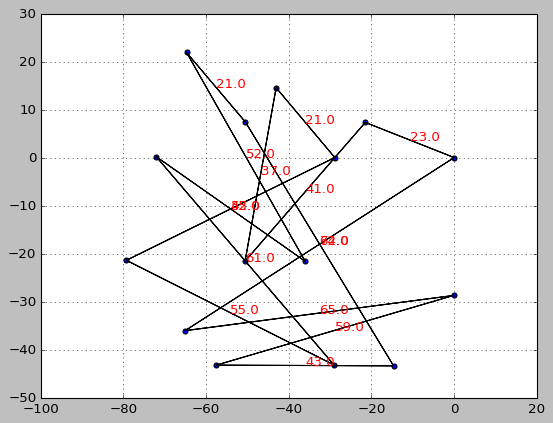

In [39]:
plot_TSP(tspmatrix, coordinates, initpath)

Found path length is 291.0


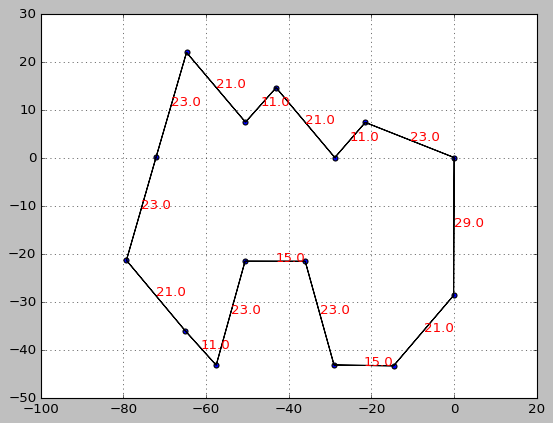

In [40]:
tspsolution = safortsp(tspmatrix, initpath)
print("Found path length is {}".format(tspsolution[1]))
plot_TSP(tspmatrix, coordinates, tspsolution[0])

Found path length is 343.0


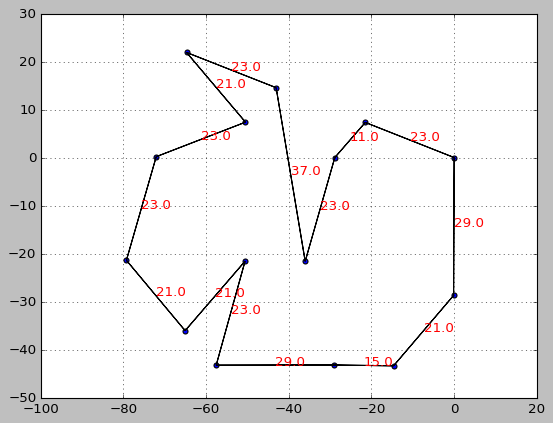

In [41]:
tspsolution = safortsp(tspmatrix, initpath)
print("Found path length is {}".format(tspsolution[1]))
plot_TSP(tspmatrix, coordinates, tspsolution[0])